### Run basic `scanpy` QC and doublet detection with `scrublet` for **PBMC Tuberculosis** _Cai Y et al 2022_

**Objective**: Review QC process and suggest changes

- **Developed by**: Carlos Talavera-López PhD
- **Modified by**: Mairi McClean
- **Computational Health Centre - Helmholtz Munich**
- ORIGINAL: v221015; MODIFIED: v221116

### Load required modules

In [3]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
executing           1.1.1
google              NA
h5py                3.6.0
hypergeom_ufunc     NA
igraph              0.10.2
ipykernel           6.16.2
ipywidgets          8.0.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.0
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.6.1
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numexpr             2.8.1
numpy               1.23.4
packaging           21.3
pandas      

### Read datasets

In [5]:
adata = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [6]:
adata.var

gene_name
gene_id                       
ENSG00000223972.5      DDX11L1
ENSG00000227232.5       WASH7P
ENSG00000278267.1    MIR6859-1
ENSG00000243485.5  MIR1302-2HG
ENSG00000284332.1    MIR1302-2
...                        ...
ENSG00000198695.2       MT-ND6
ENSG00000210194.1        MT-TE
ENSG00000198727.2       MT-CYB
ENSG00000210195.2        MT-TT
ENSG00000210196.2        MT-TP

[61533 rows x 1 columns]

In [7]:
adata.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[223089 rows x 10 columns]

### Remove scTCRseq and PFMC data

In [8]:
adata.obs['data_type'].value_counts()

scRNAseq    146168
scTCRseq     76921
Name: data_type, dtype: int64

In [9]:
adata_new = adata[~adata.obs['data_type'].isin(['scTCRseq']),:]
adata_new

View of AnnData object with n_obs × n_vars = 146168 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [10]:
adata_new.obs['data_type'].value_counts()

scRNAseq    146168
Name: data_type, dtype: int64

In [11]:
adata_new.obs['tissue'].value_counts()

PBMC    77899
PFMC    68269
Name: tissue, dtype: int64

In [12]:
adata_new_2 = adata_new[~adata_new.obs['tissue'].isin(['PFMC']),:]
adata_new_2

View of AnnData object with n_obs × n_vars = 77899 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [13]:
adata_new_2.obs['tissue'].value_counts()

PBMC    77899
Name: tissue, dtype: int64

### Read in Cai 2020 PBMC datasets and concatenate


In [14]:
#adata_new_2 is anndata object with no scTCRseq or PFMC data

adata_cai2020 = sc.read_h5ad('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/CaiY2020_PBMC_TB.raw.h5ad')
adata_cai2020

AnnData object with n_obs × n_vars = 3701271 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch'
    var: 'gene_name'

In [42]:
# Concatenation

adata_pbmc = adata_new_2.concatenate(adata_cai2020, join='inner', index_unique='none', batch_key='datasets', batch_categories=['cai2022', 'cai2020'])
adata_pbmc

/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 3779170 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets'
    var: 'gene_name'

### Make names unique

In [43]:
adata_pbmc.var_names_make_unique()
sample_object = adata_pbmc.copy()
sample_object

AnnData object with n_obs × n_vars = 3779170 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets'
    var: 'gene_name'

### Replace gene symbols 

In [44]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [45]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [46]:
sample_object.obs

study    individual  \
barcode                                                                       
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
...                                                       ...           ...   
TTTGTCATCTTGTTTG-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCATCTTTACAC-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCATCTTTACGT-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCATCTTTAGGG-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCATCTTTAGTC-H1nonecai2020                      CaiY_2021  SAMN14048019   

                                                       sample tissue  \
barcode                                                                
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
...                                                       ...    ...   
TTTGTCATCTTGTTTG-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCATCTTTACAC-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCATCTTTACGT-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCATCTTTAGGG-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCATCTTTAGTC-H1nonecai2020                      PBMC_HC_1   PBMC   

                                                           donor data_type  \
barcode                                                                      
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
...                                                          ...       ...   
TTTGTCATCTTGTTTG-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCATCTTTACAC-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCATCTTTACGT-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCATCTTTAGGG-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCATCTTTAGTC-H1nonecai2020                      SAMN14048019  scRNAseq   

                                                                 centre  \
barcode                                                                   
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
...                                                                 ...   
TTTGTCATCTTGTTTG-H1nonecai2020                      Shenzhen University   
TTTGTCATCTTTACAC-H1nonecai2020                      Shenzhen University   
TTTGTCATCTTTACGT-H1nonecai2020                      Shenzhen University   
TTTGTCATCTTTAGGG-H1nonecai2020                      Shenzhen University   
TTTGTCATCTTTAGTC-H1nonecai2020                      Shenzhen University   

                                                   version     object  \
barcode                    

### Inital scatterplot of top 20

normalizing counts per cell


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


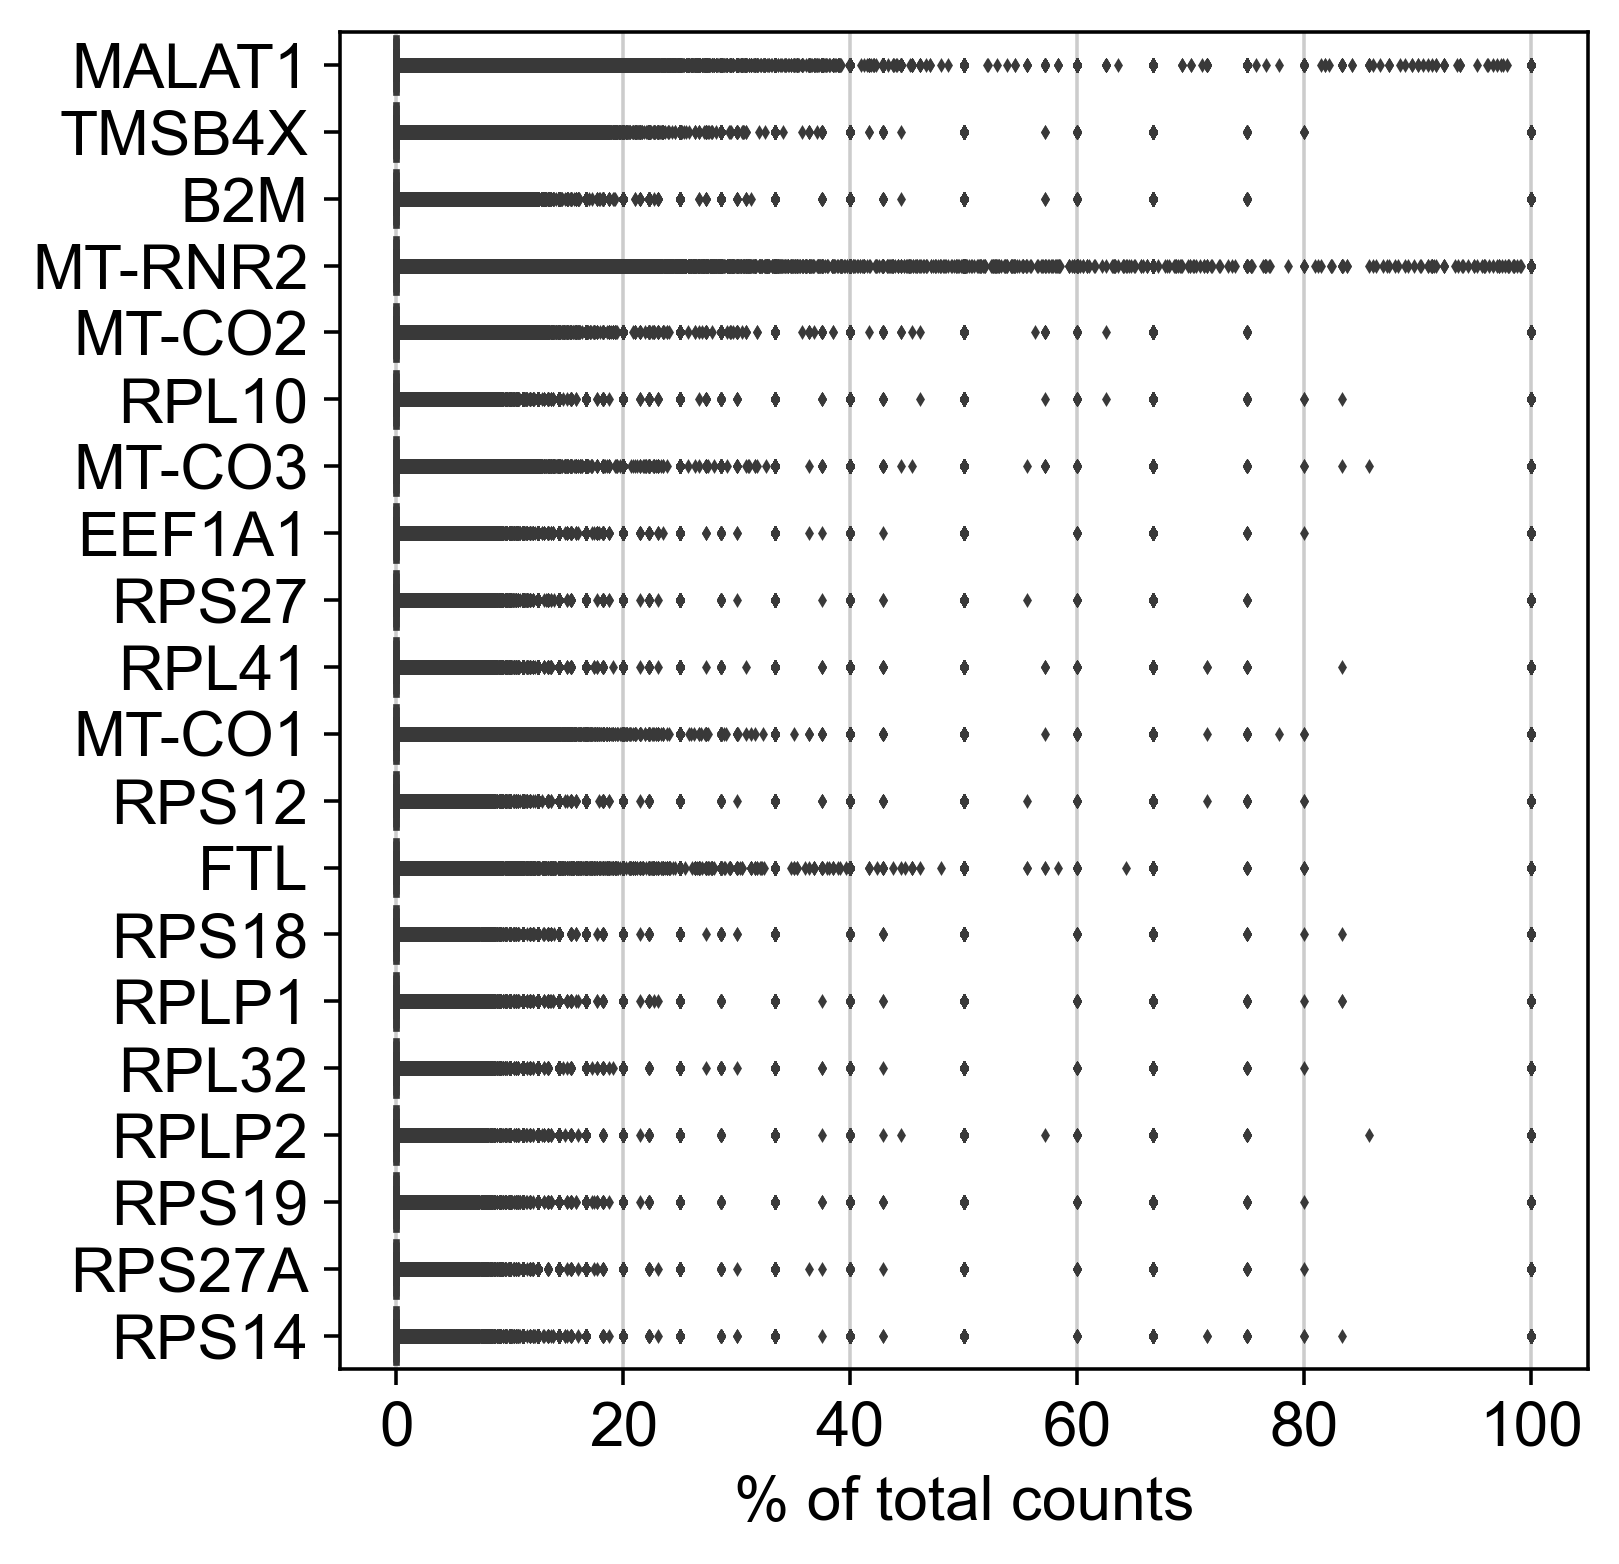

In [47]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells with less than 200 genes

In [48]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 3680607 cells that have less than 200 genes expressed
98563 61533


In [49]:
sample_object.shape

(98563, 61533)

In [50]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

### Compute QC stats

In [51]:
sample_object.shape

(98563, 61533)

In [52]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

gene_id     mt   ribo
DDX11L1      ENSG00000223972.5  False  False
WASH7P       ENSG00000227232.5  False  False
MIR6859-1    ENSG00000278267.1  False  False
MIR1302-2HG  ENSG00000243485.5  False  False
MIR1302-2    ENSG00000284332.1  False  False
...                        ...    ...    ...
MT-ND6       ENSG00000198695.2   True  False
MT-TE        ENSG00000210194.1   True  False
MT-CYB       ENSG00000198727.2   True  False
MT-TT        ENSG00000210195.2   True  False
MT-TP        ENSG00000210196.2   True  False

[61533 rows x 3 columns]

In [53]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

In [54]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [55]:
sample_object

AnnData object with n_obs × n_vars = 98563 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC metrics

In [56]:
sample_object.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=61533)

In [57]:
sample_object.var

gene_id     mt   ribo  n_cells_by_counts  mean_counts  \
DDX11L1      ENSG00000223972.5  False  False                  9     0.000101   
WASH7P       ENSG00000227232.5  False  False                 13     0.000132   
MIR6859-1    ENSG00000278267.1  False  False                  0     0.000000   
MIR1302-2HG  ENSG00000243485.5  False  False                  0     0.000000   
MIR1302-2    ENSG00000284332.1  False  False                  0     0.000000   
...                        ...    ...    ...                ...          ...   
MT-ND6       ENSG00000198695.2   True  False              23698     0.375932   
MT-TE        ENSG00000210194.1   True  False                940     0.009791   
MT-CYB       ENSG00000198727.2   True  False              88322     7.583546   
MT-TT        ENSG00000210195.2   True  False                261     0.002668   
MT-TP        ENSG00000210196.2   True  False               2227     0.024350   

             pct_dropout_by_counts  total_counts  
DDX11L1                  99.990869          10.0  
WASH7P                   99.986810          13.0  
MIR6859-1               100.000000           0.0  
MIR1302-2HG             100.000000           0.0  
MIR1302-2               100.000000           0.0  
...                            ...           ...  
MT-ND6                   75.956495       37053.0  
MT-TE                    99.046295         965.0  
MT-CYB                   10.390309      747457.0  
MT-TT                    99.735195         263.0  
MT-TP                    97.740531        2400.0  

[61533 rows x 7 columns]

In [58]:
sample_object.obs

study    individual  \
barcode                                                                       
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseqnonecai...  CaiY_2022     HRI111687   
...                                                       ...           ...   
TTTGTCAGTCGCGGTT-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCAGTCGCTTCT-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCAGTTCGAATC-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCAGTTTGGGCC-H1nonecai2020                      CaiY_2021  SAMN14048019   
TTTGTCATCCCATTAT-H1nonecai2020                      CaiY_2021  SAMN14048019   

                                                       sample tissue  \
barcode                                                                
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseqnonecai...  HRS180101   PBMC   
...                                                       ...    ...   
TTTGTCAGTCGCGGTT-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCAGTCGCTTCT-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCAGTTCGAATC-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCAGTTTGGGCC-H1nonecai2020                      PBMC_HC_1   PBMC   
TTTGTCATCCCATTAT-H1nonecai2020                      PBMC_HC_1   PBMC   

                                                           donor data_type  \
barcode                                                                      
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseqnonecai...            P5  scRNAseq   
...                                                          ...       ...   
TTTGTCAGTCGCGGTT-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCAGTCGCTTCT-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCAGTTCGAATC-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCAGTTTGGGCC-H1nonecai2020                      SAMN14048019  scRNAseq   
TTTGTCATCCCATTAT-H1nonecai2020                      SAMN14048019  scRNAseq   

                                                                 centre  \
barcode                                                                   
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseqnonecai...  Shenzhen University   
...                                                                 ...   
TTTGTCAGTCGCGGTT-H1nonecai2020                      Shenzhen University   
TTTGTCAGTCGCTTCT-H1nonecai2020                      Shenzhen University   
TTTGTCAGTTCGAATC-H1nonecai2020                      Shenzhen University   
TTTGTCAGTTTGGGCC-H1nonecai2020                      Shenzhen University   
TTTGTCATCCCATTAT-H1nonecai2020                      Shenzhen University   

                                                   version     object  \
barcode                    

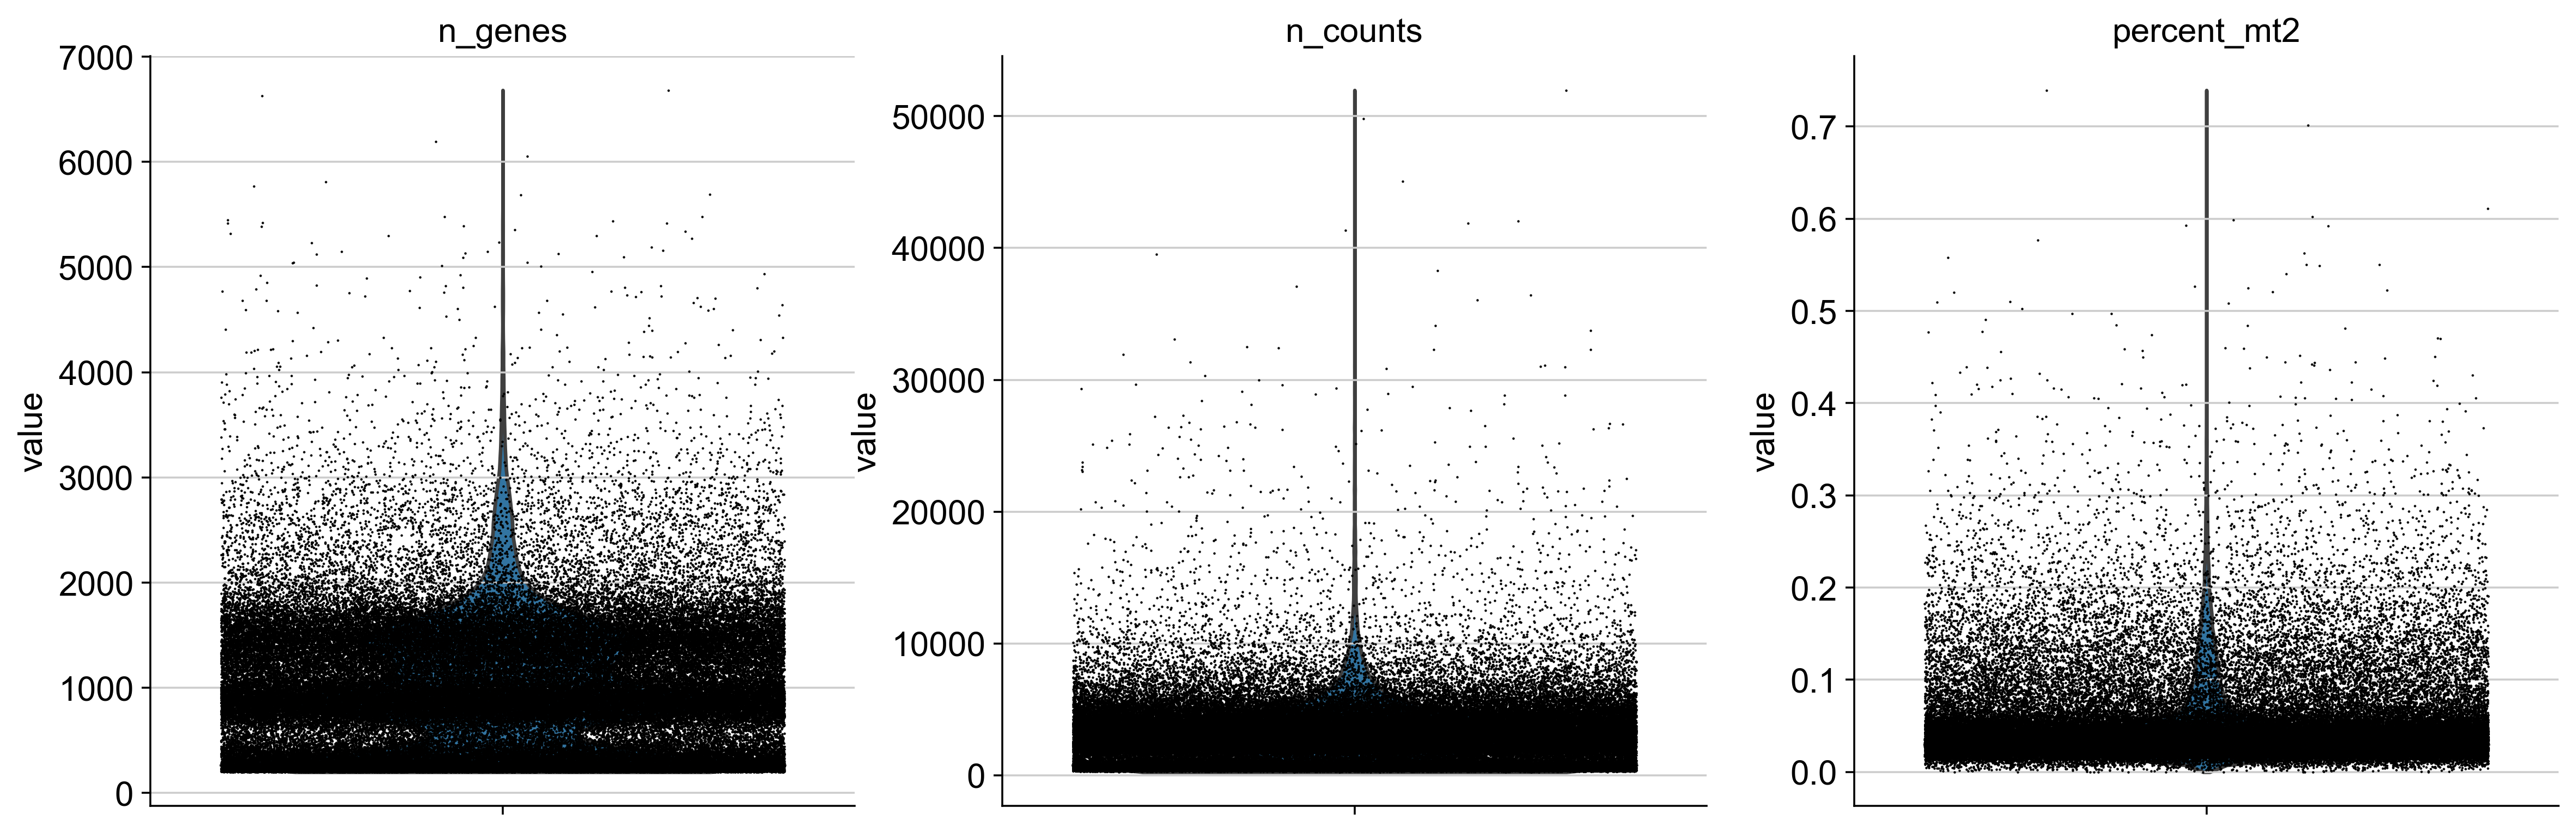

In [59]:
# This particular visualisation was from Anna's notebook; obs columns names not the same as Cai 2020 [these specific names were not found in the Cai20 adata.var nor adata.obs, but this code still worked?]
# No option to visualize ribosomal RNA?

sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter=0.4, multi_panel=True)

In [ ]:
# Density plot of n_genes (gene distribution)



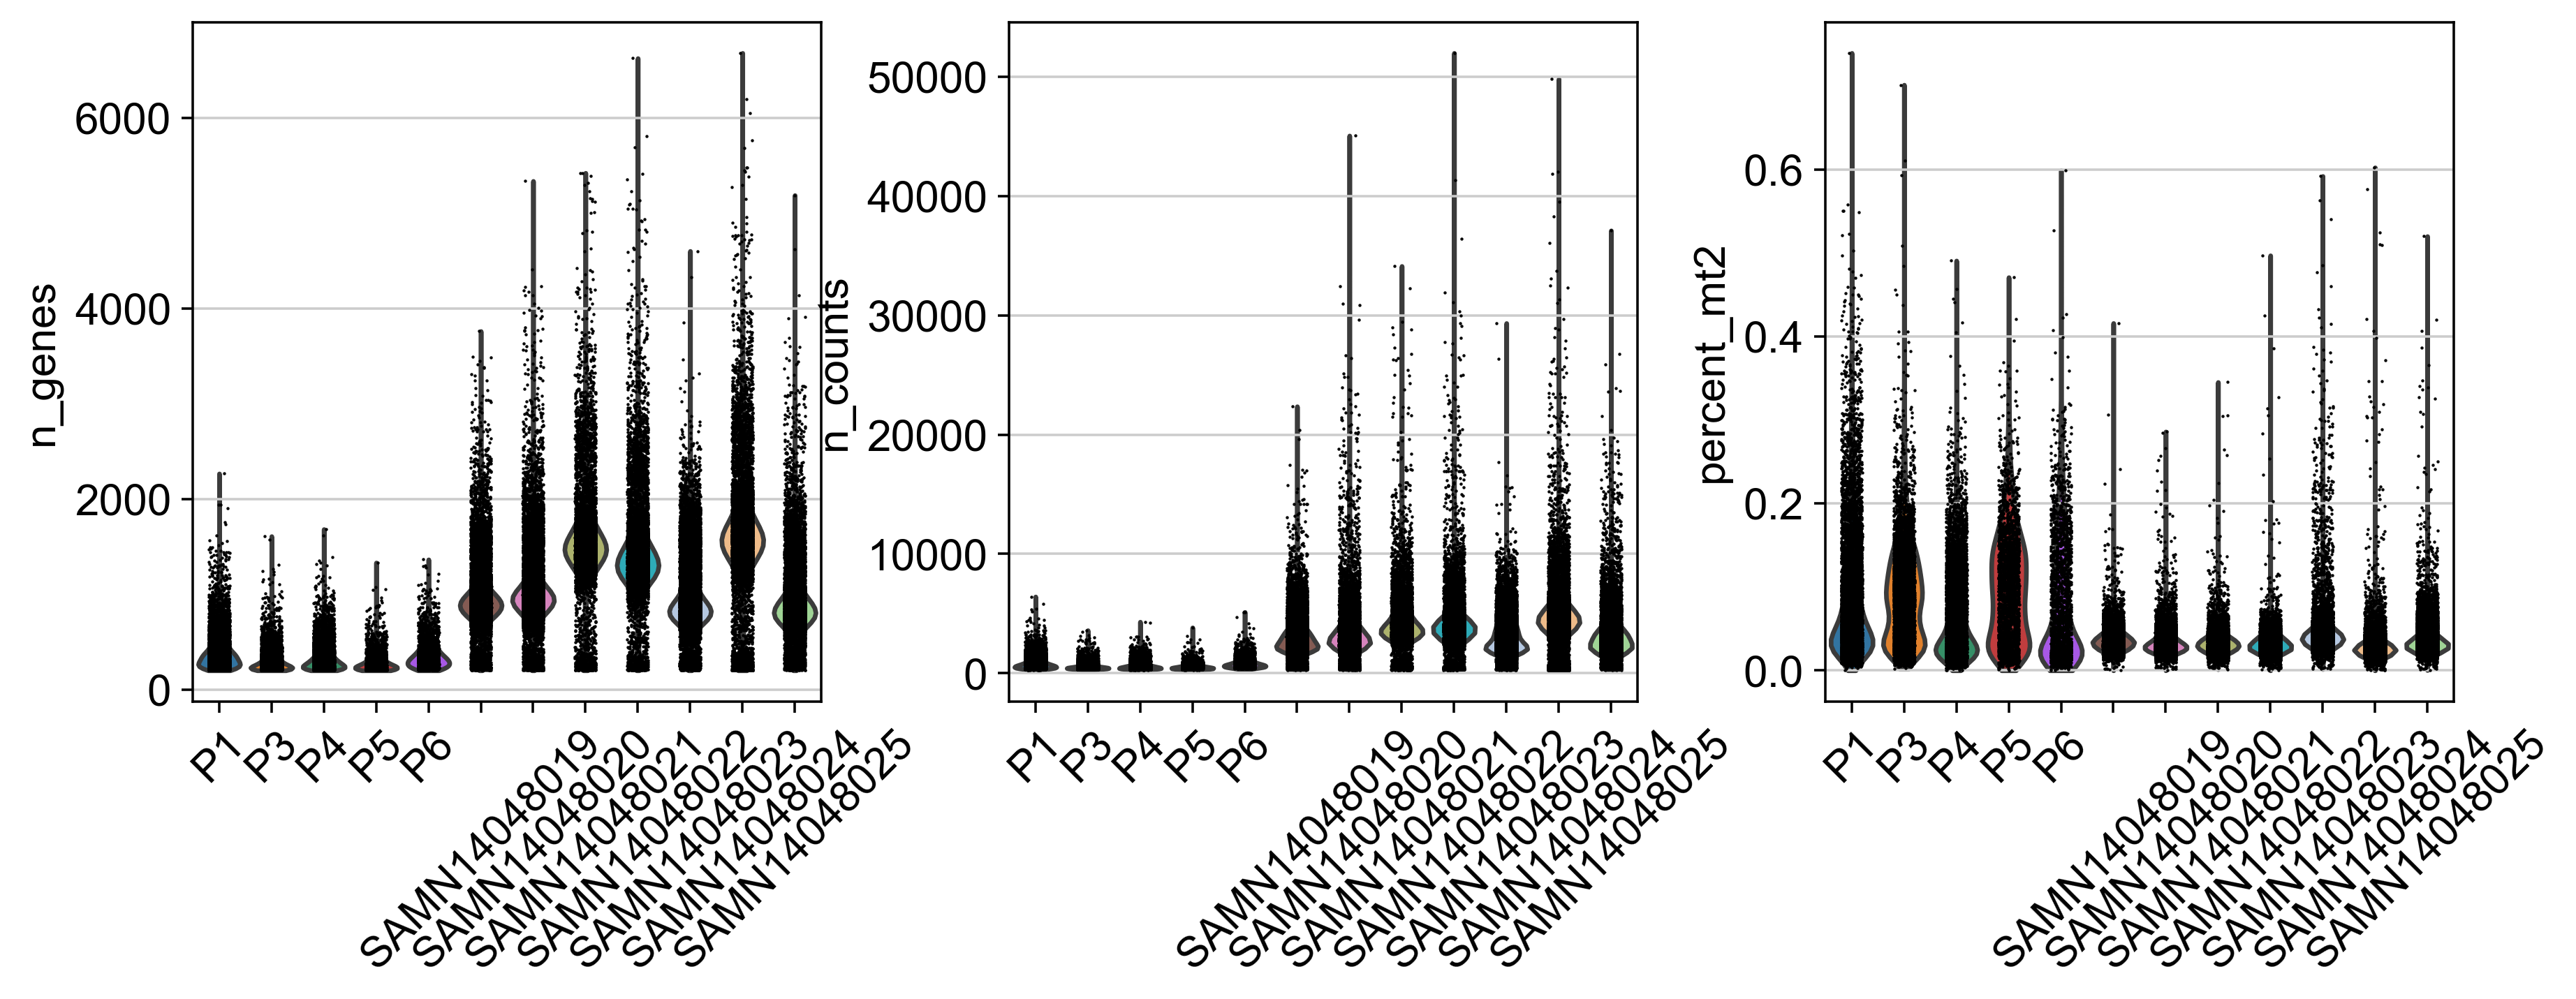

In [60]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

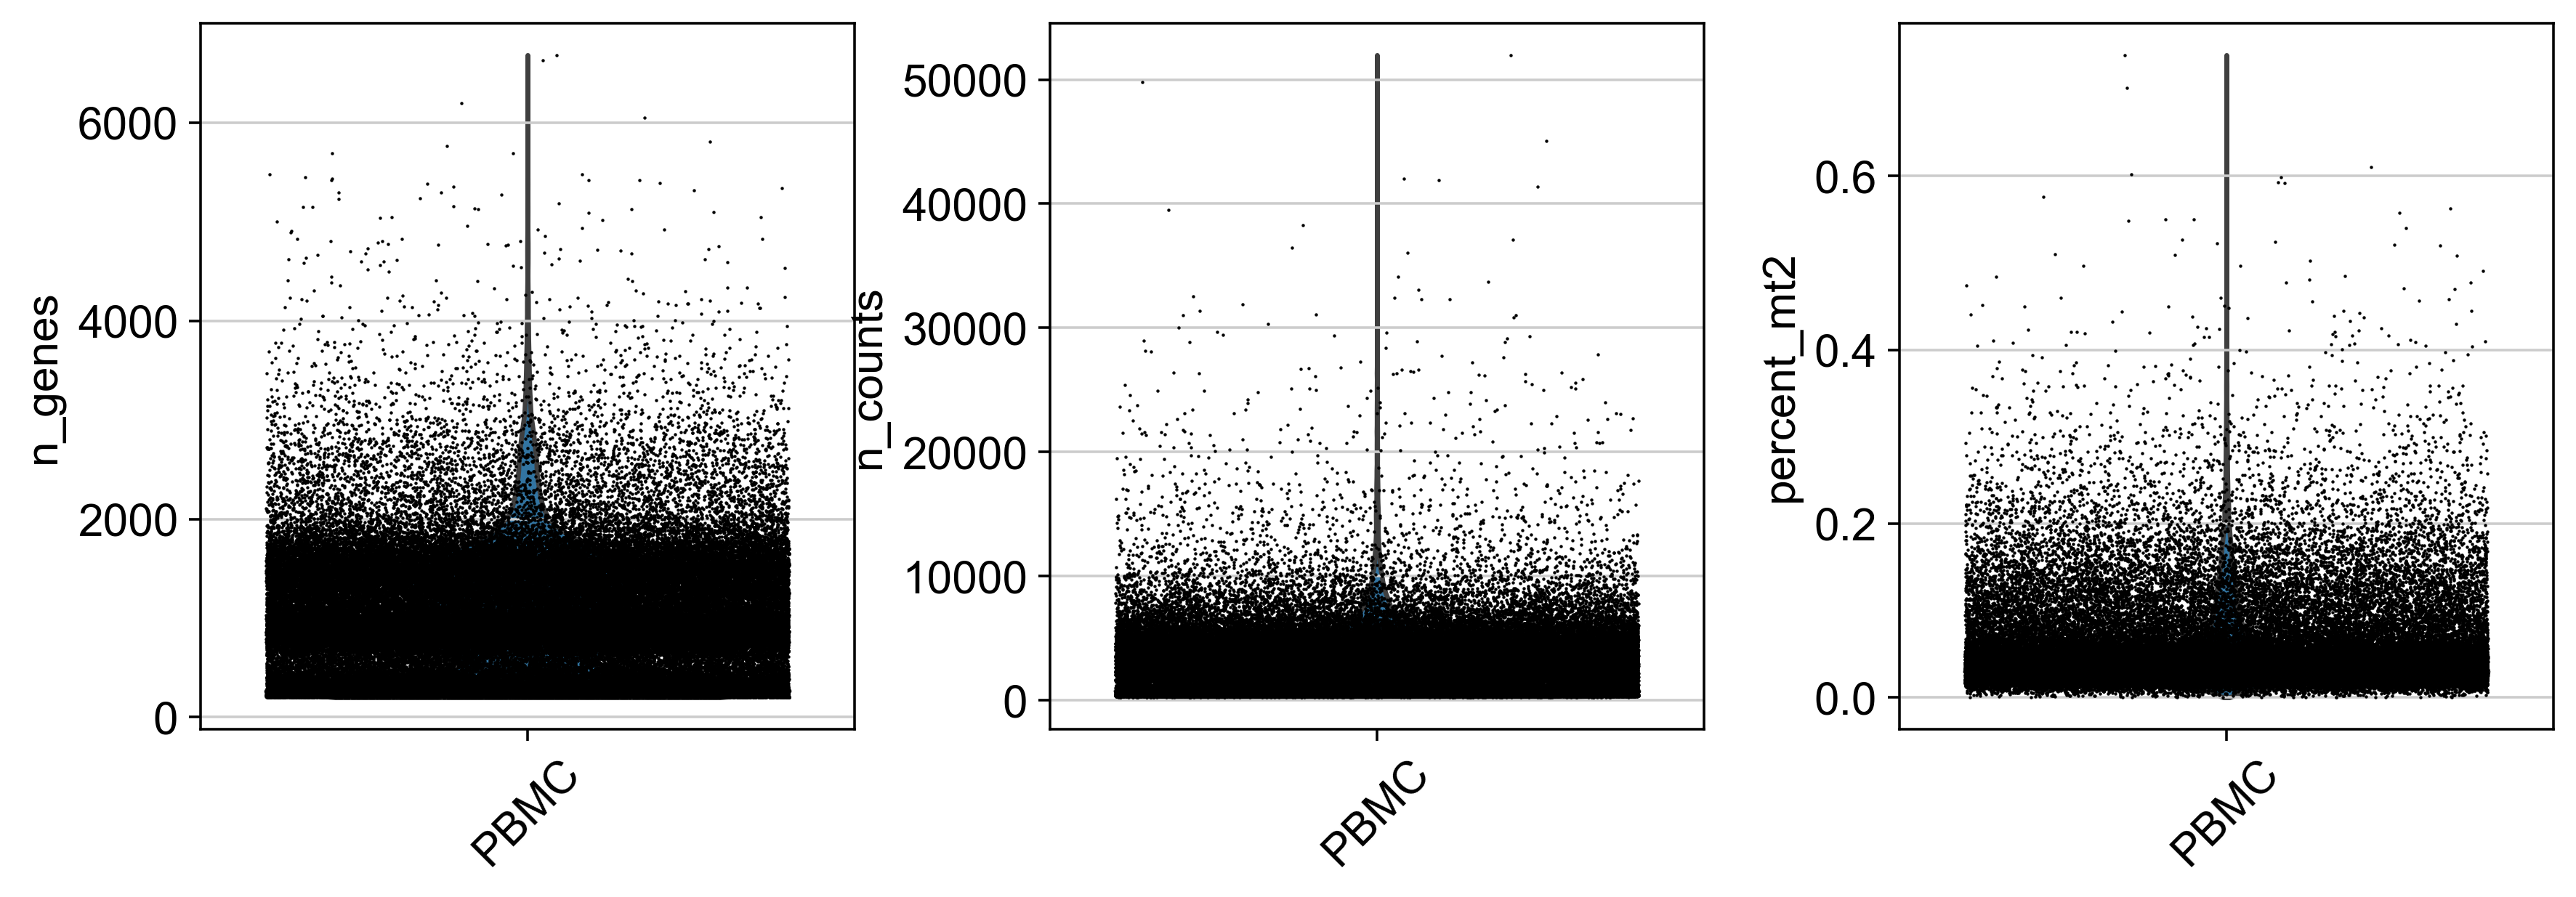

In [61]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'],
             jitter=0.4, groupby = 'tissue', rotation = 45)

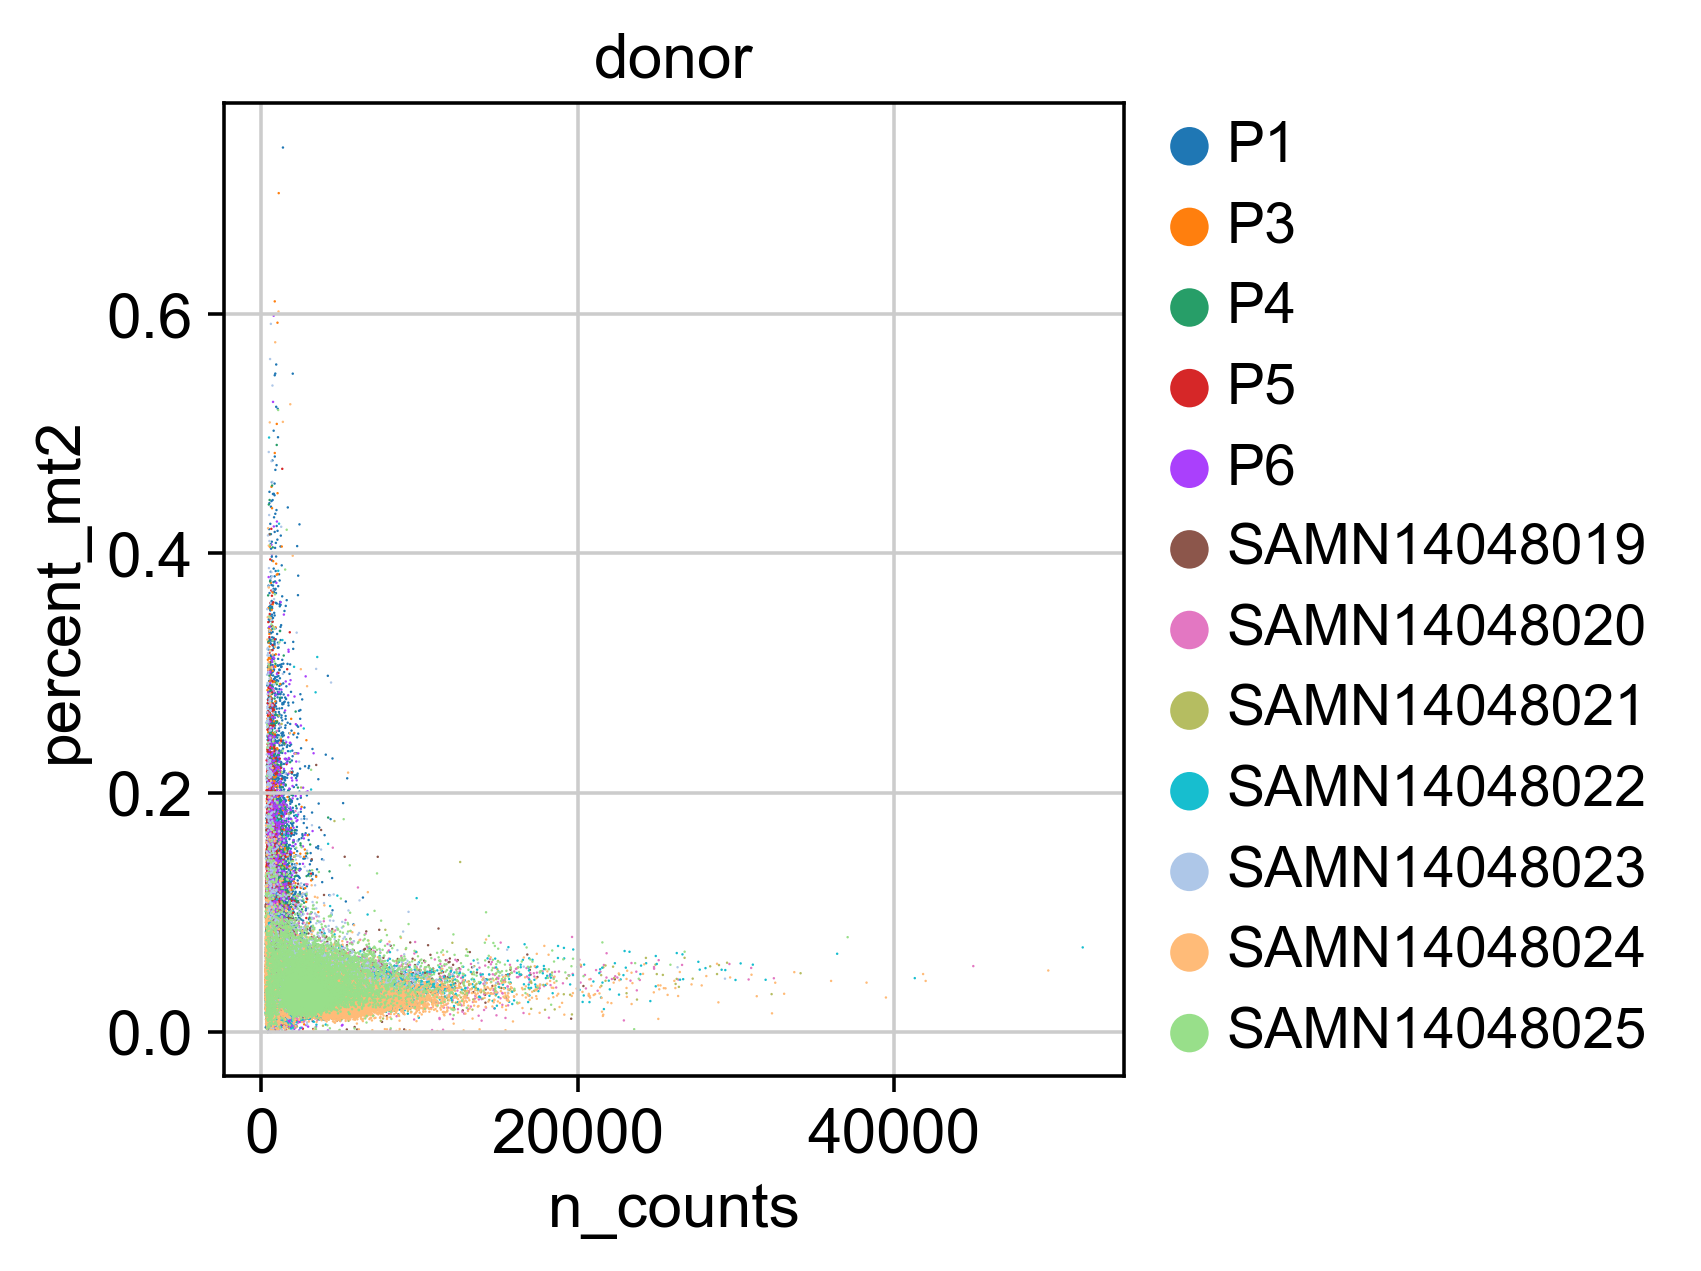

In [62]:
sc.pl.scatter(sample_object, x = 'n_counts', y = 'percent_mt2', color = "donor")

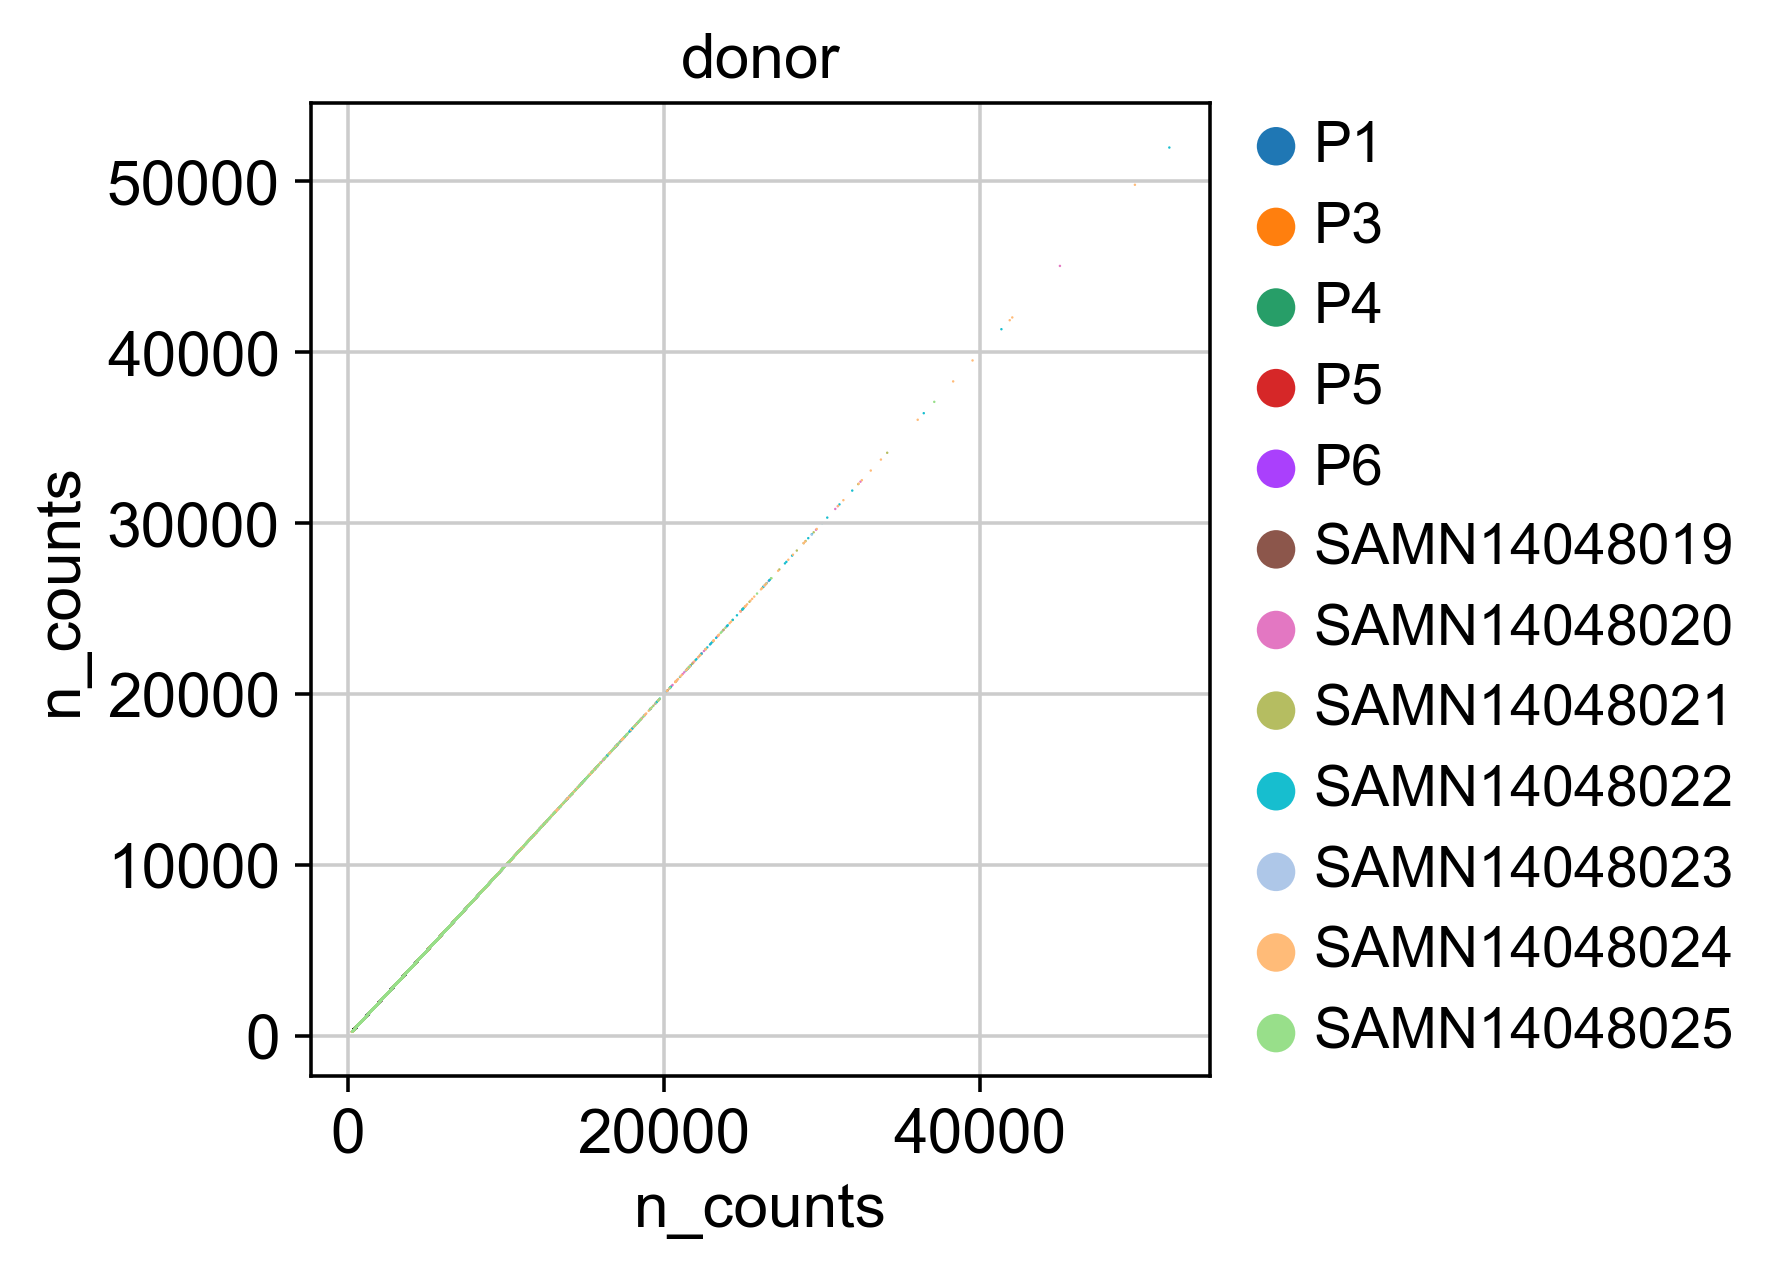

In [63]:
sc.pl.scatter(sample_object, x='n_counts', y='n_counts', color = "donor")

### Add sample sex covariate

In [64]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [65]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [66]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'SNORA70', 'XGY2', 'RNU6-1334P', 'SRY', 'RNASEH2CP1',
       'TOMM22P2', 'RPS4Y1', 'HSFY3P', 'NAP1L1P2',
       ...
       'PPP1R12BP1', 'RNU6-1314P', 'CYCSP48', 'ANKRD36P1', 'TPTE2P4',
       'CYCSP49', 'SLC25A15P1', 'PARP4P1', 'CCNQP2', 'CTBP2P1'],
      dtype='object', length=429)

In [67]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

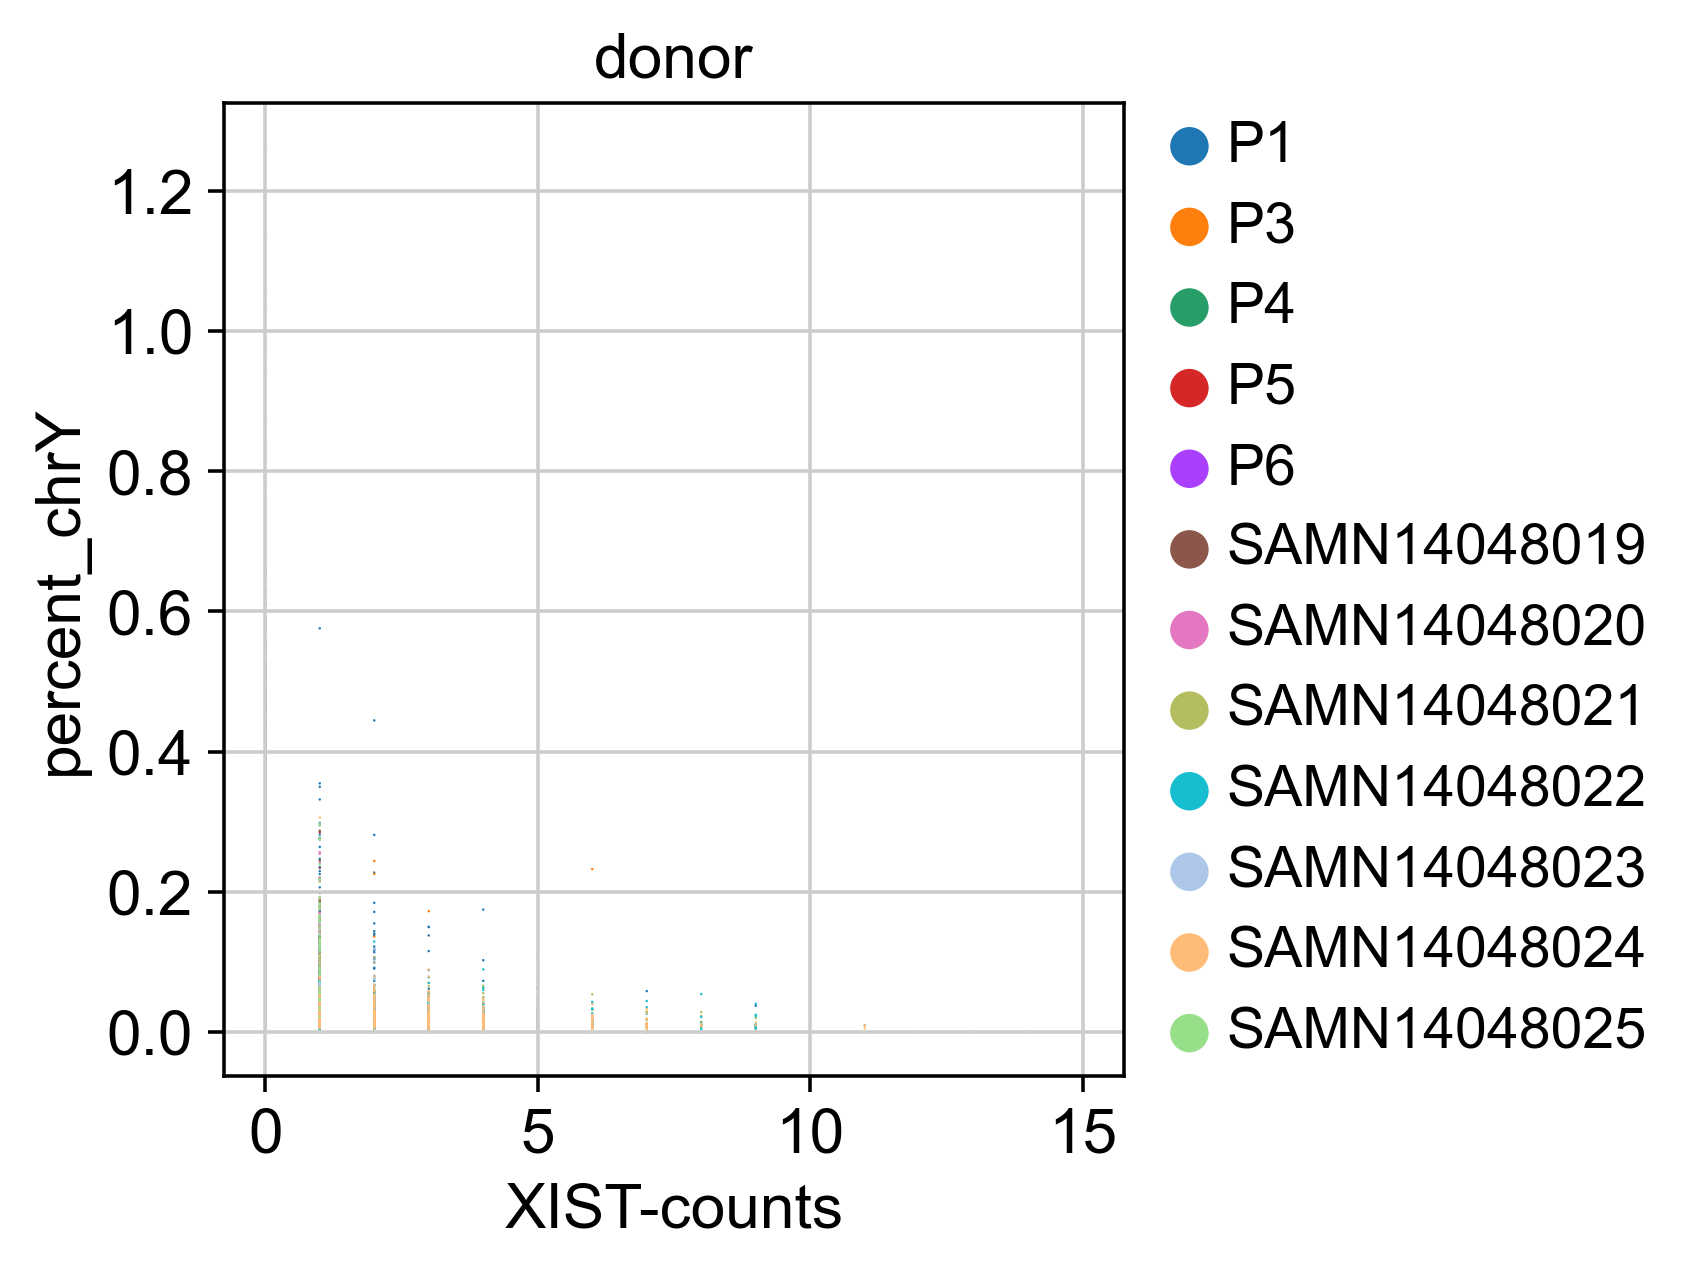

In [68]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "donor")

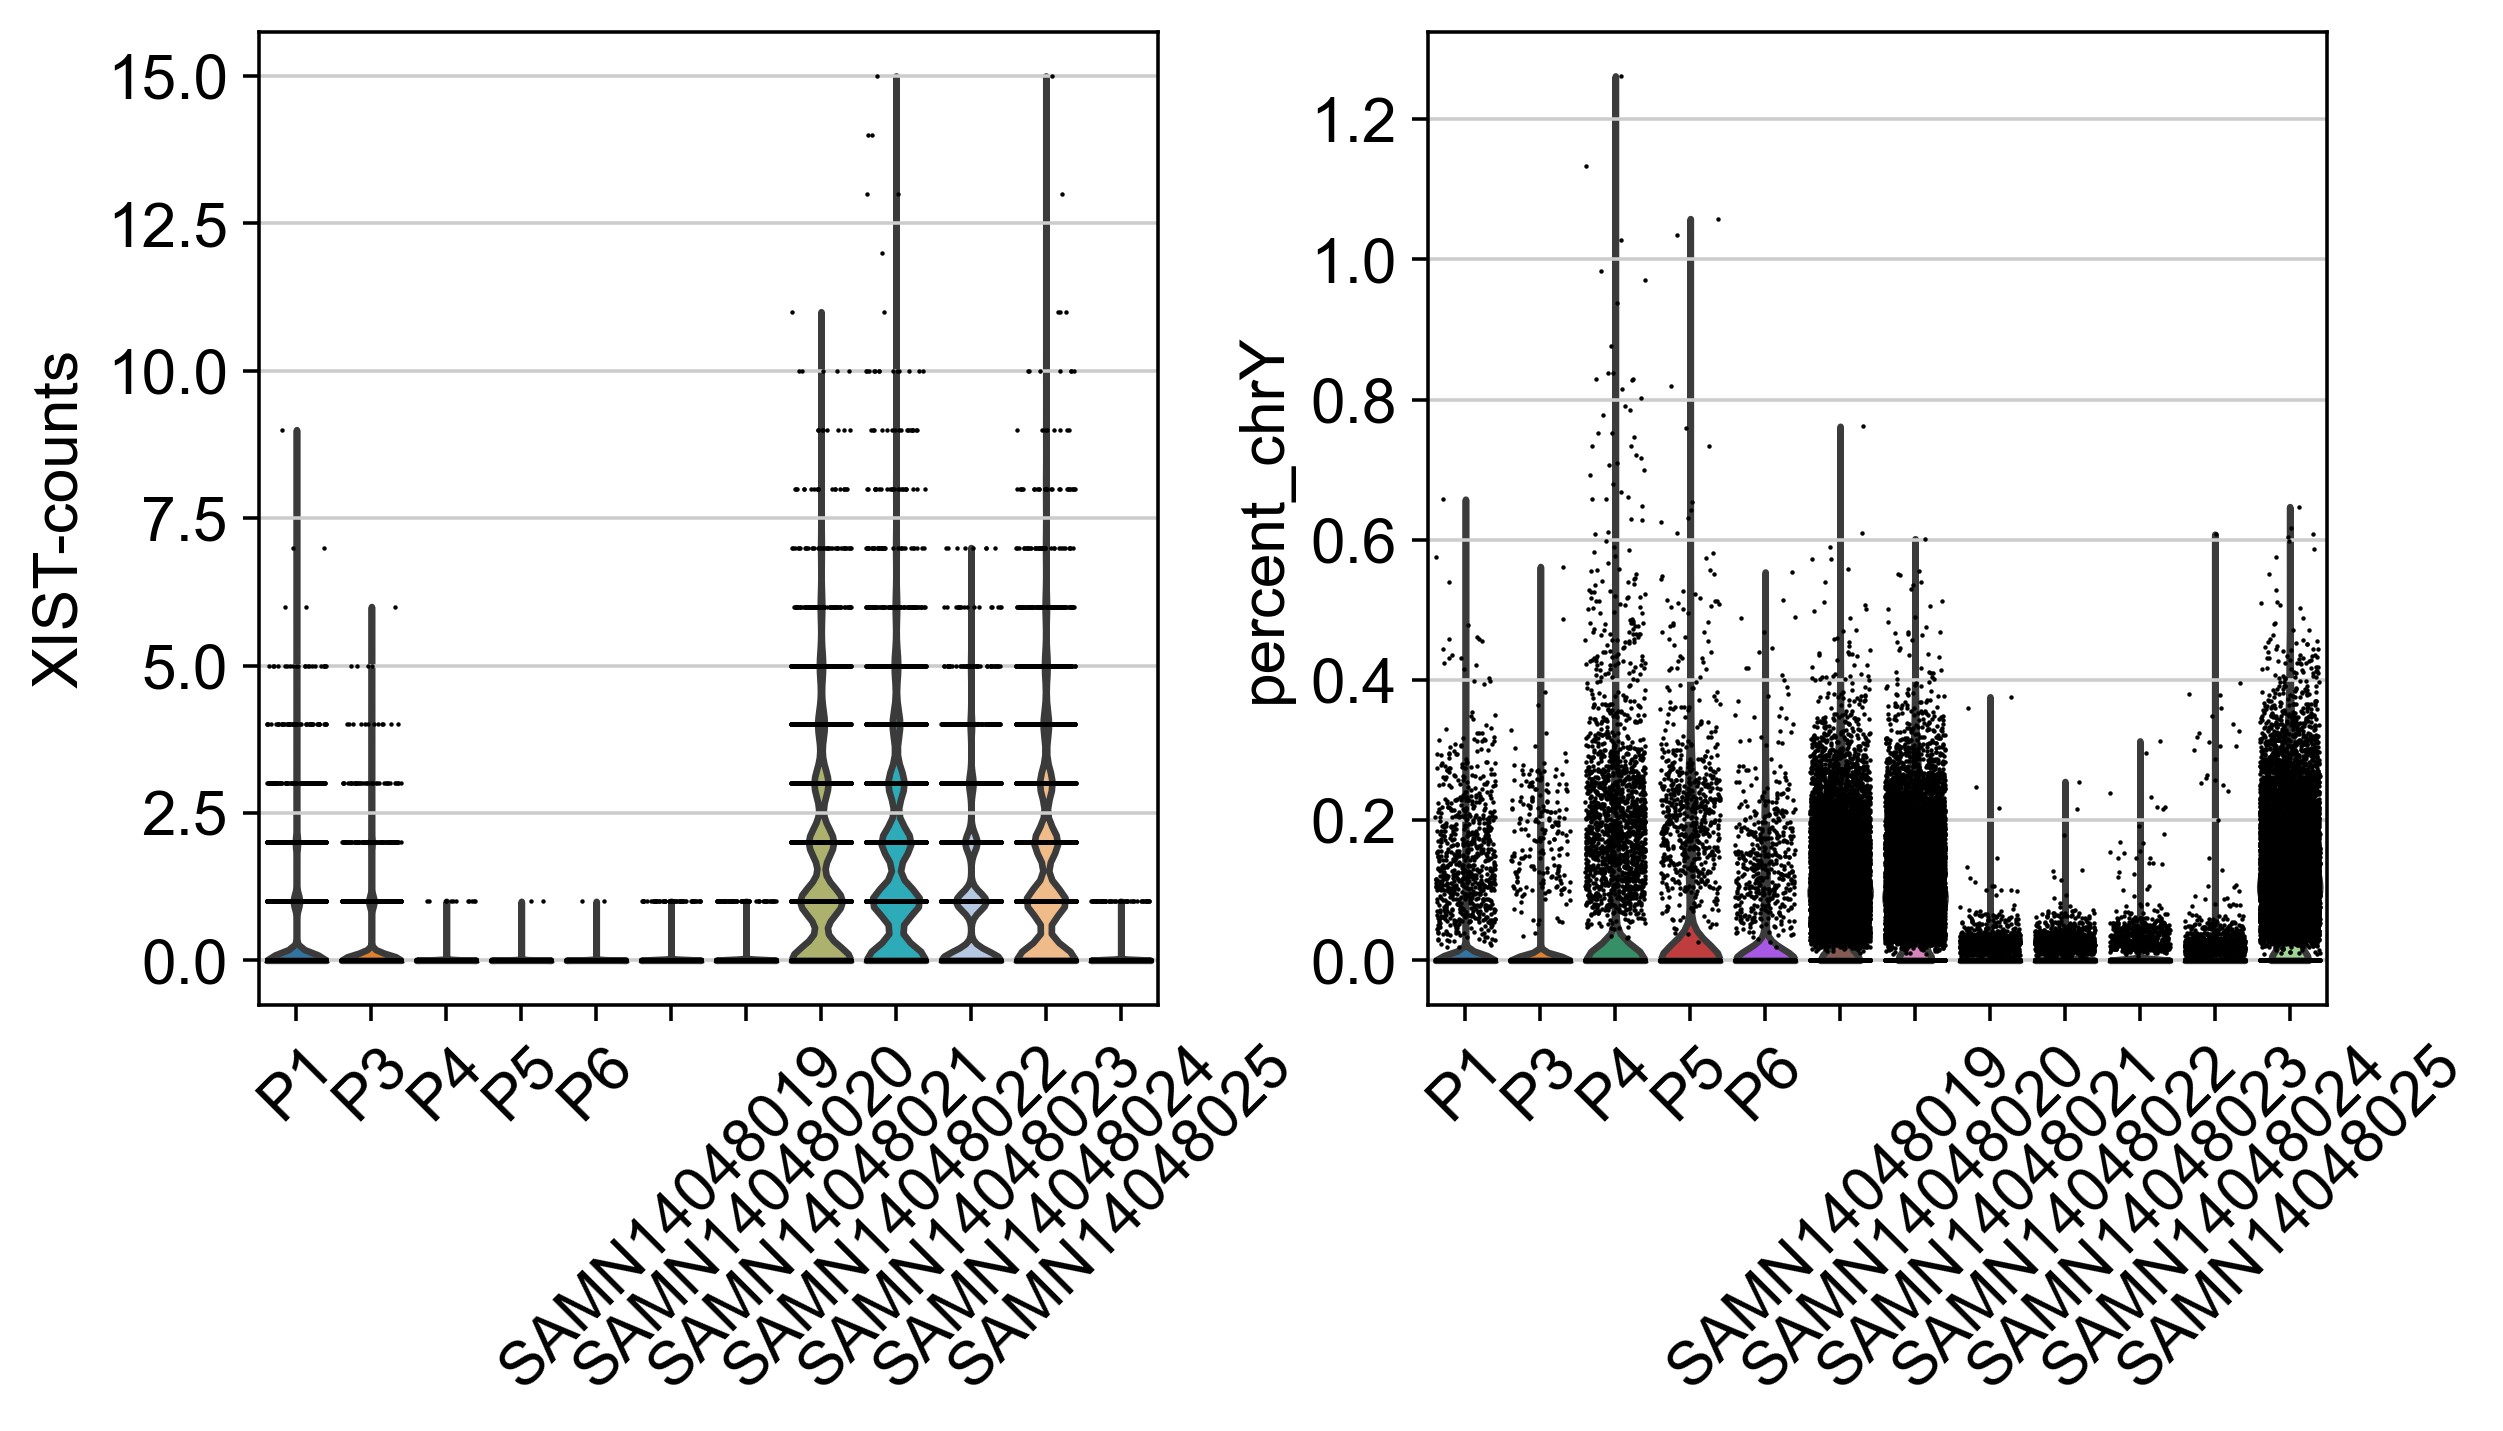

In [69]:
sc.pl.violin(sample_object, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [70]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [71]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [72]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['SPRR3', 'S100A9', 'S100A8', 'RGS18', 'ENSG00000288934', 'G0S2', 'TMSB10', 'IGKC', 'IGKV4-1', 'IGKV3-11', 'IGKV3-15', 'IGKV3-20', 'ENSG00000286848', 'JCHAIN', 'CXCL8', 'PPBP', 'SPP1', 'ENSG00000248223', 'CD74', 'ENSG00000230521', 'ENSG00000227766', 'ENSG00000271581', '7SK-4', 'ACTB', 'ENSG00000243004', 'NAMPT', 'ENSG00000203396', 'VIM-AS1', 'HBB', 'HBD', 'BEST1', 'FTH1', 'MALAT1', 'LYZ', 'ENSG00000257764', 'BTG1-DT', 'TPT1', 'ENSG00000273149', 'IGHA2', 'IGHG4', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHM', 'B2M', 'HBA2', 'HBA1', 'MT2A', 'MT1X', 'ENO3', 'ENSG00000266865', 'CCL4L2', 'H3-3B', 'JSRP1', 'ENSG00000267598', 'ENSG00000283907', 'FTL', 'BCAS4', 'PRAMENP', 'IGLV3-25', 'IGLV3-19', 'IGLL5', 'IGLC2', 'IGLC3', 'IGLC7', 'TMSB4X', 'SAT1', 'TIMP1', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND

calculating cell cycle phase
computing score 'S_score'


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    430 total control genes are used. (0:00:00)
computing score 'G2M_score'


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    428 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


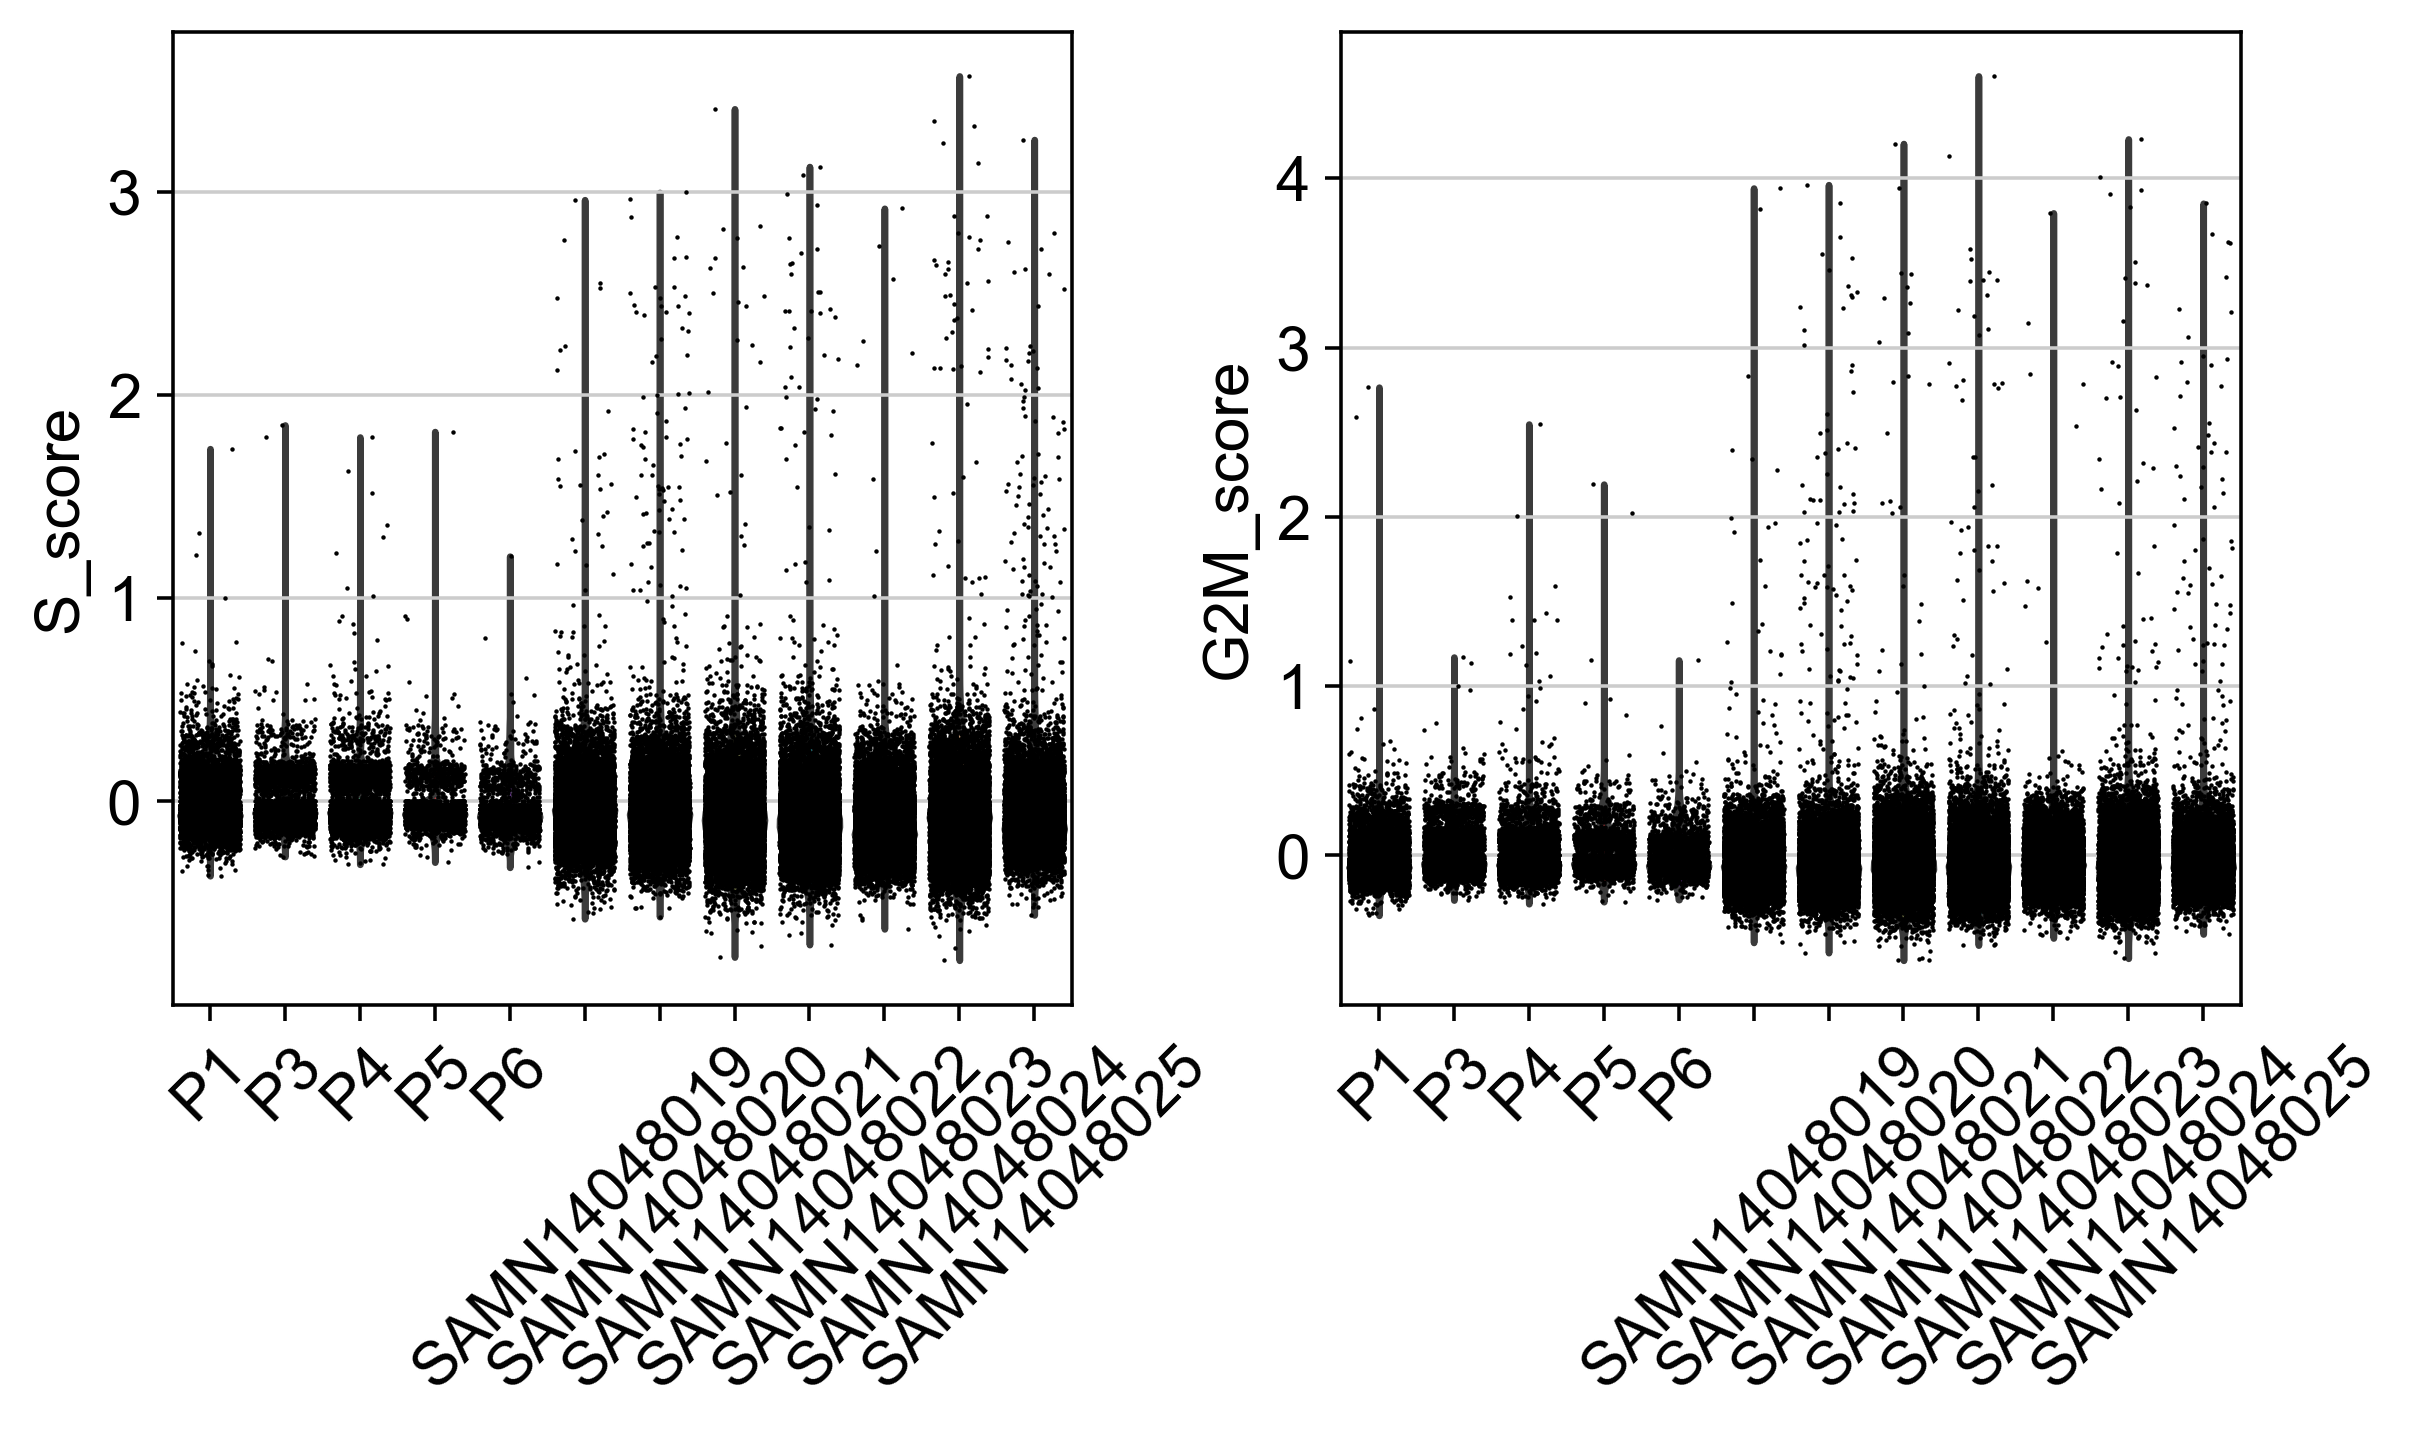

In [73]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [74]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 98563 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors'

### Predict doublets

In [75]:
holder = np.zeros((sample_object.shape[0],))
for smp in np.unique(sample_object.obs['sample']):
    if smp == []:
        continue
    adata_smp = sample_object[sample_object.obs['sample'] == smp]
    scrub = scr.Scrublet(adata_smp.X)
    adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
    holder[sample_object.obs['sample'] == smp] = adata_smp.obs['predicted_doublets']
sample_object.obs['predicted_doublets'] = holder

sum(sample_object.obs['predicted_doublets'])
sample_object

Preprocessing...
Simulating doublets...


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 25.0%
Elapsed time: 9.3 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 66.7%
Elapsed time: 6.3 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 31.2%
Elapsed time: 8.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.11
Detected doublet rate = 43.1%
Estimated detectable doublet fraction = 54.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 79.6%
Elapsed time: 2.5 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 40.0%
Elapsed time: 2.8 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 31.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.3%
Elapsed time: 10.5 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 35.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.5%
Elapsed time: 10.1 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 16.5%
Estimated detectable doublet fraction = 77.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 21.4%
Elapsed time: 9.7 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 53.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.5%
Elapsed time: 10.7 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 24.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.3%
Elapsed time: 10.8 seconds


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()


Preprocessing...


/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.57
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 50.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 13.1 seconds
Preprocessing...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/opt/homebrew/Caskroom/mambaforge/base/envs/scanpy_v1.9.1/lib/python3.10/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 2.8%
Estimated detectable doublet fraction = 36.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.5%
Elapsed time: 9.6 seconds


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_26212/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()


AnnData object with n_obs × n_vars = 98563 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors'

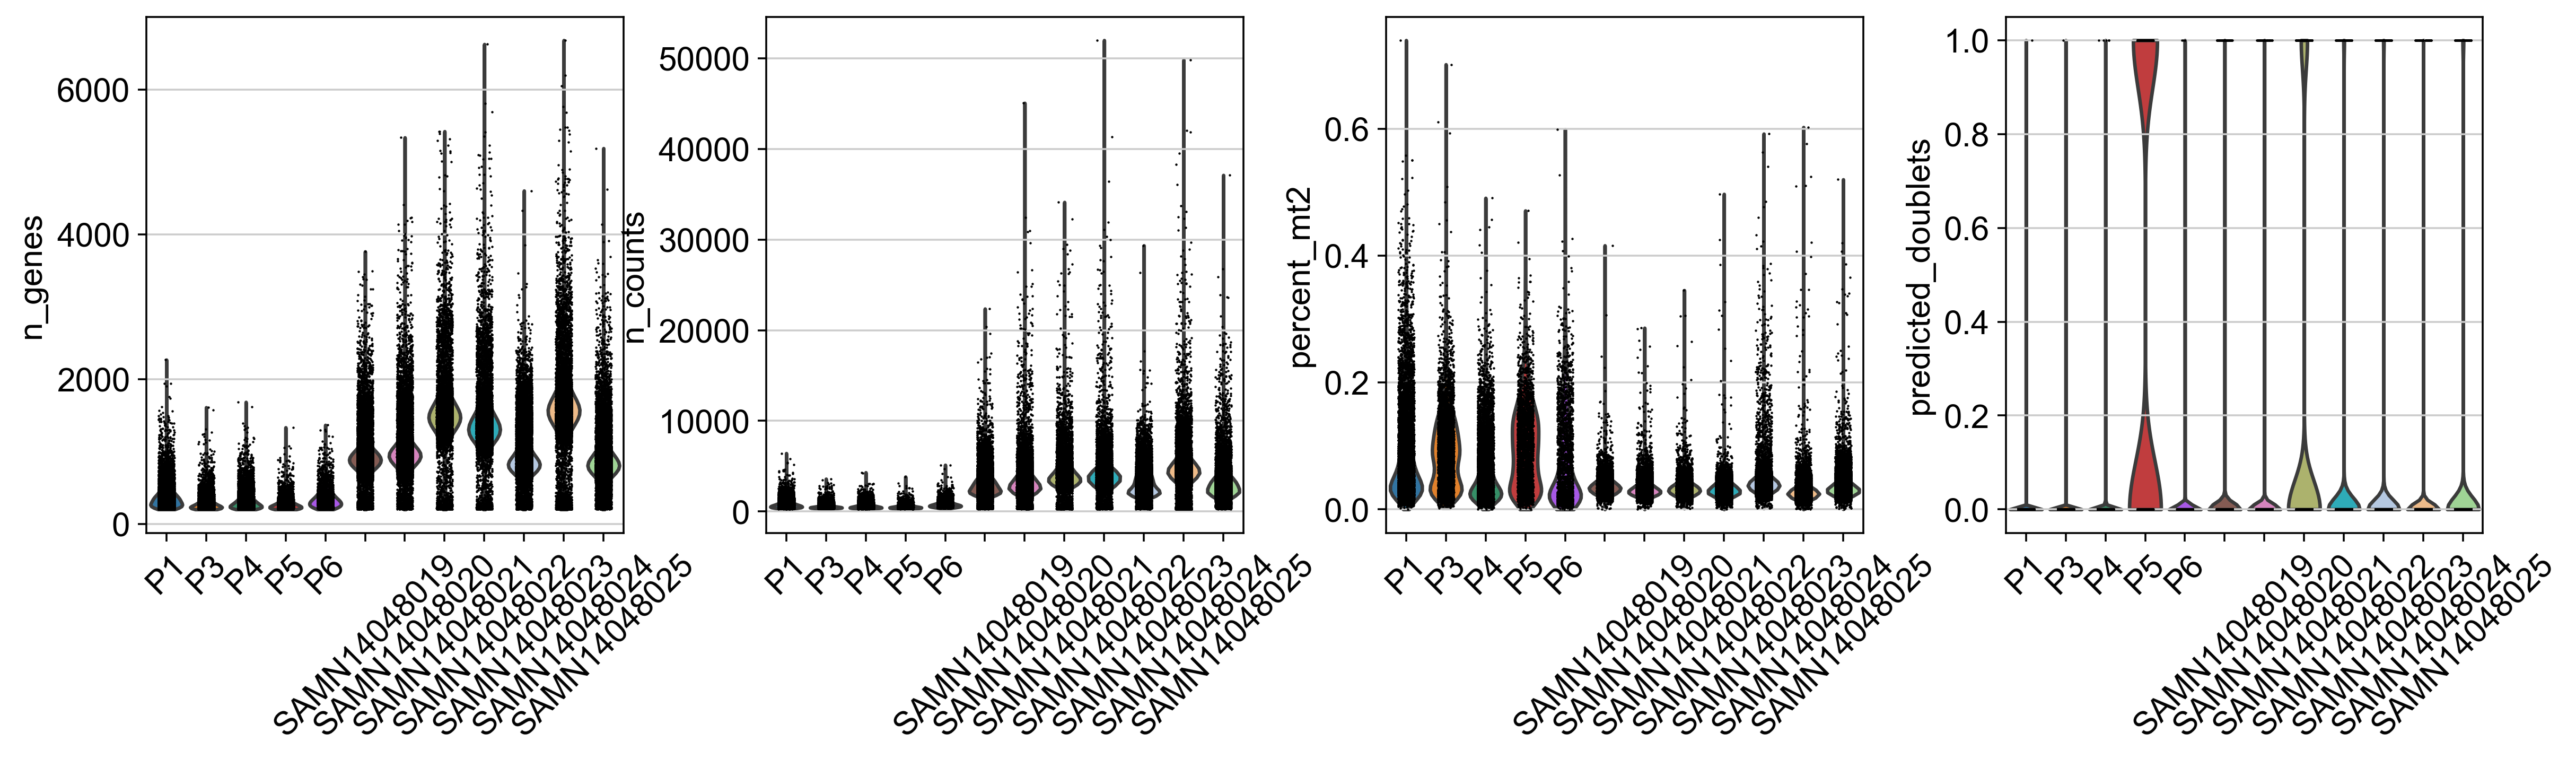

In [76]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

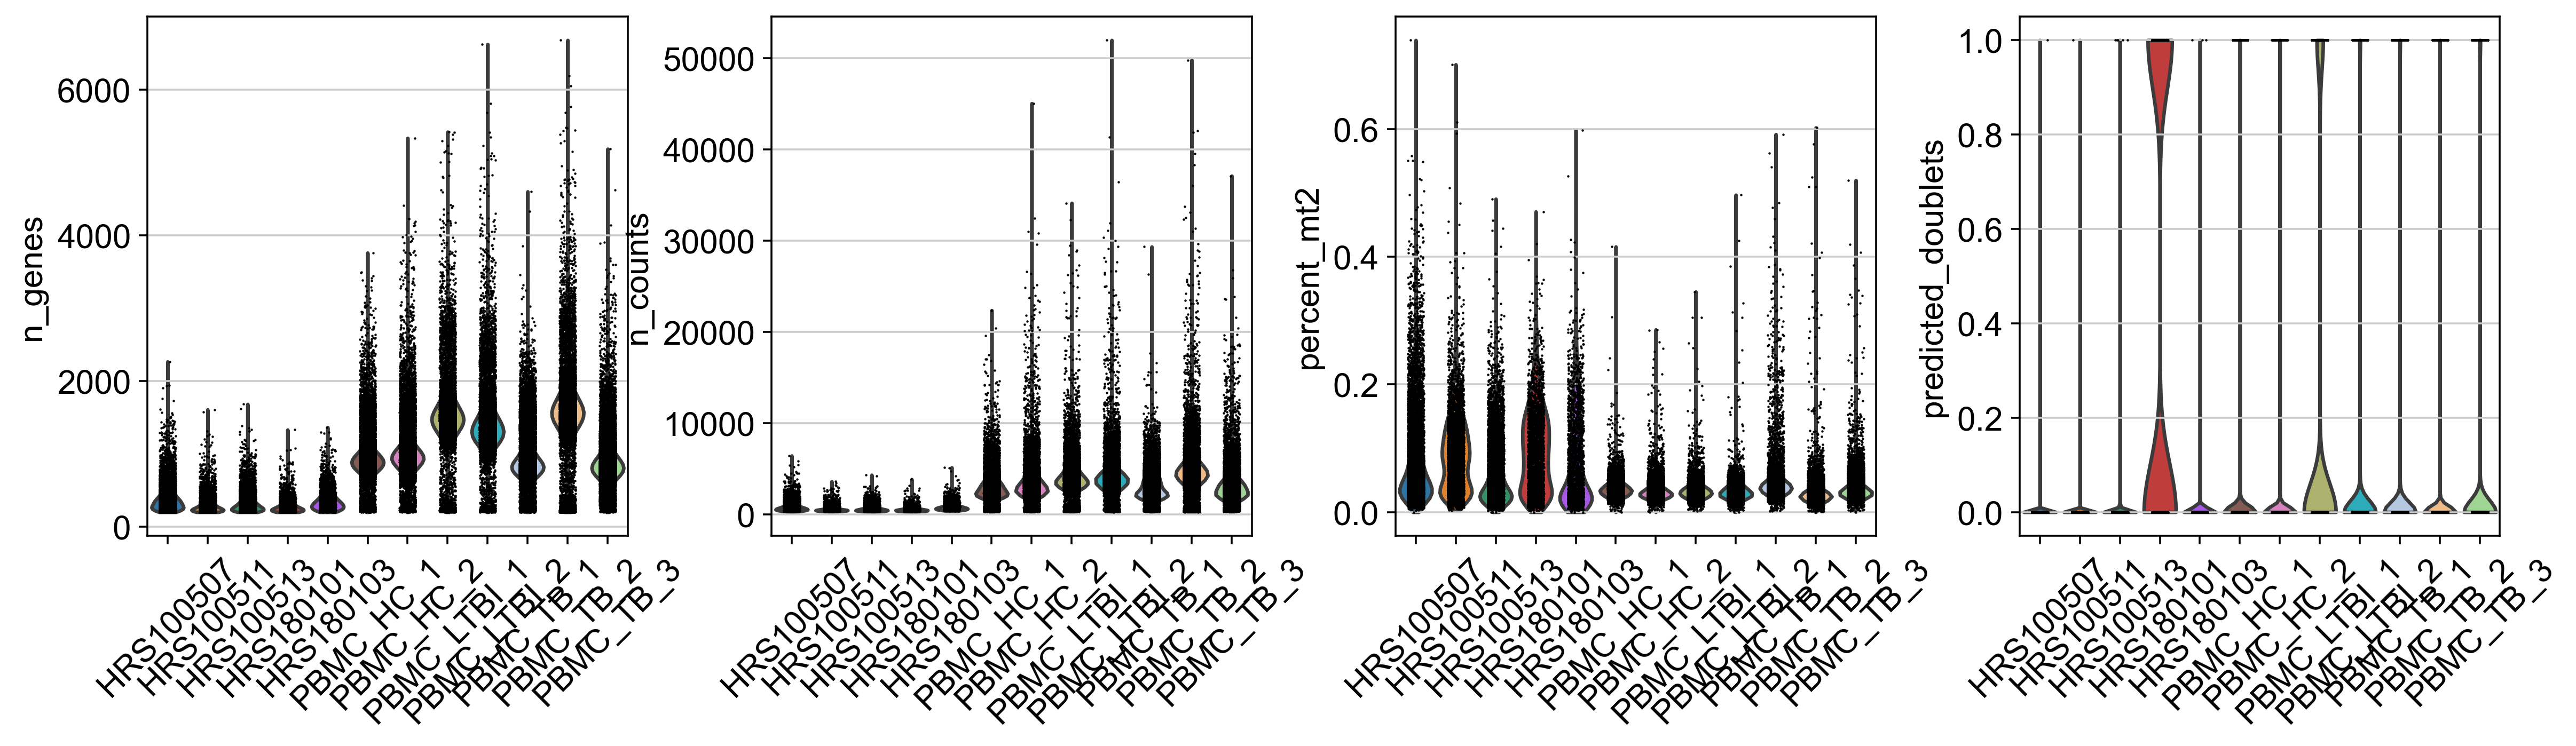

In [77]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Prepare counts for individual slots


In [78]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 98563 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'age', 'gender', 'status', 'batch', 'datasets', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'tissue_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [79]:
sample_object.write('/Users/mairi.mcclean/github/data/tb_pbmc_datasets/qcd_objects/0512_0912_exported_objects/06/CaiY2022_TB_PBMC_QCed_pre-process_mm221206.h5ad')